<a href="https://colab.research.google.com/github/path2deep/Kotak_Educational_data/blob/main/UrduAllAssessmentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import io
import seaborn as sns 
import matplotlib.pyplot as plt
from google.colab import files

### Upload the login file

In [ ]:
uploaded = files.upload()

Saving allana.xlsx to allana (1).xlsx


In [ ]:
file = io.BytesIO(uploaded.get("allana.xlsx"))
login = pd.read_excel(file, 'STDXUSE_Digital', skiprows=[0])

#### upload the assessments

######English

In [ ]:
uploaded = files.upload()

Saving eng_baseline.xlsx to eng_baseline.xlsx


In [ ]:
file = io.BytesIO(uploaded.get("eng_baseline.xlsx"))
eng = pd.read_excel(file, 'Report')

######Math

In [ ]:
uploaded = files.upload()

Saving math_semi.xlsx to math_semi.xlsx


In [ ]:
file = io.BytesIO(uploaded.get("math_semi.xlsx"))
df3 = pd.read_excel(file, 'Report')

In [ ]:
uploaded = files.upload()

Saving math_urdu.xlsx to math_urdu.xlsx


In [ ]:
file = io.BytesIO(uploaded.get("math_urdu.xlsx"))
df4 = pd.read_excel(file, 'Report')

######Science

In [ ]:
uploaded = files.upload()

Saving sci_urdu.xlsx to sci_urdu.xlsx


In [ ]:
file = io.BytesIO(uploaded.get("sci_urdu.xlsx"))
df5 = pd.read_excel(file, 'Report')

In [ ]:
uploaded = files.upload()

Saving science_semi.xlsx to science_semi.xlsx


In [ ]:
file = io.BytesIO(uploaded.get("science_semi.xlsx"))
df6 = pd.read_excel(file, 'Report')

##Analysis

In [58]:
#uploading the login file
#columns name
cols = {'Unnamed: 0': "Student/Teacher", 'Unnamed: 1': "School", 'Unnamed: 2':"Course", 'Unnamed: 3': "UserID",
        'Unnamed: 4': "EnrollmentID", 'Unnamed: 5': "StudentName", 'Unnamed: 6': "Division", 'Unnamed: 7': "EmailID",
        'Unnamed: 8': "Gender",
   }
login = login.rename(columns=cols)
login = login[['Student/Teacher', 'School','EnrollmentID',"Division", 'StudentName',]]


#English Analysis
#English columns selected
eng = eng[['EnrollmentID', 'ChapterName',]]

#combining login and english assessments
base_eng = pd.merge(login,
                     eng,
                      
                      on = 'EnrollmentID',
                      how = 'left'
                         )


col = {'ChapterName': "English"}
base_eng = base_eng.rename(columns=col)

#Maths Analysis
math = pd.concat([df3, df4])
# Math columns selected
math = math[['EnrollmentID','ChapterName',]]
#combining login eng and science paper
base_eng_math = pd.merge(base_eng,
                        math,
                      
                      on = 'EnrollmentID',
                      how = 'left'
                         )
col = {'ChapterName': "Math"}
base_eng_math = base_eng_math.rename(columns=col)
#Science Analysis
sci = pd.concat([df5, df6])
# Science columns selected
sci = sci[['EnrollmentID','ChapterName',]]


#combining login eng math science
base_eng_math_sci = pd.merge(base_eng_math,
                        sci,
                      
                      on = 'EnrollmentID',
                      how = 'left'
                         )
col = {'ChapterName': "Science"}
base_eng_math_sci = base_eng_math_sci.rename(columns=col)


print(base_eng_math_sci.shape)
base_eng_math_sci= base_eng_math_sci.drop_duplicates(subset=['EnrollmentID'], keep='first')
print(base_eng_math_sci.shape)

base_eng_math_sci['English'] = base_eng_math_sci['English'].replace(['English Baseline'],'Attempted')
base_eng_math_sci['Math'] = base_eng_math_sci['Math'].replace(['Maths Baseline (Semi)', 'Maths Baseline (Urdu)'],'Attempted')
base_eng_math_sci['Science'] = base_eng_math_sci['Science'].replace(['Science baseline (Urdu)', 'Science Baseline (Semi)'],'Attempted')

#download 
base_eng_math_sci = base_eng_math_sci[['School', 'EnrollmentID', 'Division', 'StudentName','English', 'Math', 'Science']]


(264, 8)
(214, 8)


## download the files

In [ ]:
base_eng_math_sci.to_excel('school_name.xlsx')

In [59]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

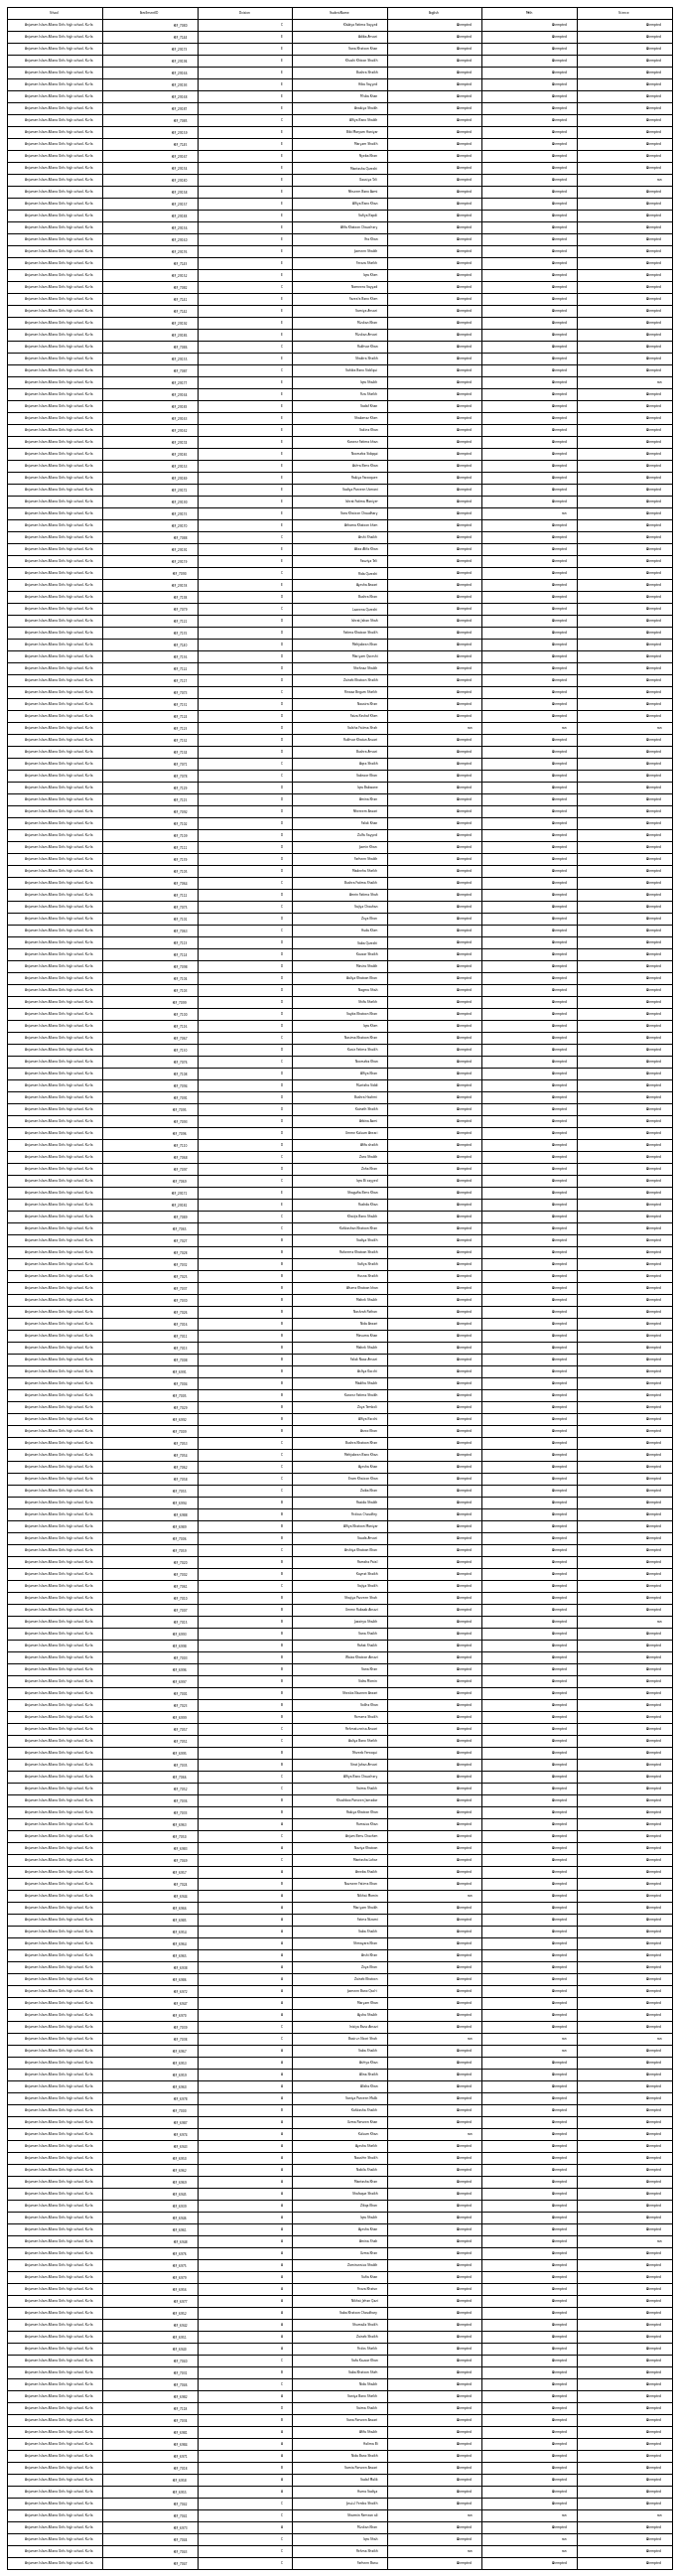

In [60]:
fig, ax =plt.subplots(figsize=(12,4))
ax.axis('tight')
ax.axis('off')
the_table = ax.table(cellText=base_eng_math_sci.values,colLabels=base_eng_math_sci.columns,loc='center')


pp = PdfPages("foo.pdf")
pp.savefig(fig, bbox_inches='tight')
pp.close()